In [1]:
from __future__ import division, print_function
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import MaxPooling1D, Dense, Dropout,Flatten, Activation, Embedding, Conv1D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.python.keras.datasets import imdb
data = np.load('../fac_cond256_unit8.npz')
raw_X=data['cond']
# raw_X=np.squeeze(data['cond'],-1)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)

y_min=[np.min(raw_Y[:,0]),np.min(raw_Y[:,1]),np.min(raw_Y[:,2])]
y_max=[np.max(raw_Y[:,0]),np.max(raw_Y[:,1]),np.max(raw_Y[:,2])]
# raw_X=(raw_X[:,0]-x_min)/(x_max-x_min)
raw_Y[:,0]=(raw_Y[:,0]-y_min[0])/(y_max[0]-y_min[0])
raw_Y[:,1]=(raw_Y[:,1]-y_min[1])/(y_max[1]-y_min[1])
raw_Y[:,2]=(raw_Y[:,2]-y_min[2])/(y_max[2]-y_min[2])
BATCH_SIZE = 256   
NUM_EPOCHS = 10000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(y_max)
print(y_max[0]-y_min[0],y_max[1]-y_min[1],y_max[2]-y_min[2])



# NUM_TIMESTEPS = 65
# BATCH_SIZE = 128   
# NUM_EPOCHS = 5000
# Xtrain=raw_X[:-1000]
# Ytrain=raw_Y[:-1000]
# Xtest=raw_X[-1000:]
# Ytest=raw_Y[-1000:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain[0].shape)

[4.999253, 0.849988, 0.029993]
3.9978760000000007 0.09995299999999996 0.029987
(2000, 65, 1) (1000, 65, 1) (2000, 3) (1000, 3)
(65, 1)


In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3,padding='same', input_shape=( 65,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3,padding='same',  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3))
model.add(Activation('tanh'))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [ ]:
model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)

Train on 2000 samples, validate on 1000 samples


In [59]:
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 
pre = model.predict(Xtest, batch_size=BATCH_SIZE)

8/8 [==============================] - 0s 5ms/step - loss: 1.7850 - mean_squared_error: 1.7850

MSE: 1.785, RMSE: 1.336


In [60]:
ae=np.maximum(pre-Ytest,Ytest-pre)
mae0=np.mean(ae[0])
mae1=np.mean(ae[1])
mae2=np.mean(ae[2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))


MAE0: 0.298, MAE1: 0.461, MAE2: 0.646,

MSE0: 0.546, MSE1: 0.679, MSE2: 0.804,


In [61]:
print(pre.shape,Ytest.shape)

(1000, 3) (1000, 3)


In [62]:
pre[0]

array([0.9997841 , 0.85534835, 0.039469  ], dtype=float32)

In [63]:
ae[0]

array([0.82867189, 0.02945735, 0.035349  ])

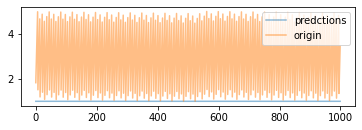

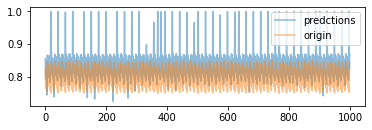

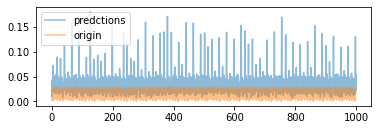

In [64]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=0.5)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=0.5)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=0.5)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()